In [38]:
# from softcomputing_packages_bu import *
from apyori import apriori
import pandas as pd
import numpy as np

In [63]:
# Load dataset
hc_csv_raw = pd.read_csv('.datasets/2.0-discretized-v2-2-with-label-resampled.csv')
hc_csv_raw.head()
len(hc_csv_raw)

19189

In [65]:
# Sampling (for Development)
n_sample = 10000
hc_csv = hc_csv_raw.sample(frac=1)
hc_csv = hc_csv.iloc[:n_sample]
hc_csv.head()

,Voltage,Global Active Power,Global Intensity,Global Reactive Power,Kitchen,Laundry,Climate Control System,Attention Type,CAM Type,Power Pattern
8180,1,1,1,1,0,0,0,1,6,1
8323,1,1,1,1,0,0,0,2,5,0
7370,1,0,0,1,0,0,0,2,0,3
17782,1,1,1,2,0,0,0,2,6,1
12100,1,0,0,1,0,0,0,0,0,3


In [66]:
# Preprocess dataset
for c in range(7):
    print("[%d] Column Preprocessing: %s" %(c, hc_csv.columns[c]))
    for r in range(hc_csv.shape[0]):
        if(hc_csv.iloc[r,c]==3):
            hc_csv.iloc[r,c] = hc_csv.columns[c]+' 75-100%'
        elif(hc_csv.iloc[r,c]==2):
            hc_csv.iloc[r,c] = hc_csv.columns[c]+' 50-75%'
        elif(hc_csv.iloc[r,c]==1):
            hc_csv.iloc[r,c] = hc_csv.columns[c]+' 25-50%'
        elif(hc_csv.iloc[r,c]==0):
            hc_csv.iloc[r,c] = '-1'
        else:
            hc_csv.iloc[r,c] = '-1'
for c in range(3):
    print("[%d] Column Preprocessing: %s" %(c+7, hc_csv.columns[c+7]))
    for r in range(hc_csv.shape[0]):
        hc_csv.iloc[r,c+7] = hc_csv.columns[c+7]+' '+str(hc_csv.iloc[r,c+7])
print("Done.")

[0] Column Preprocessing: Voltage
[1] Column Preprocessing: Global Active Power
[2] Column Preprocessing: Global Intensity
[3] Column Preprocessing: Global Reactive Power
[4] Column Preprocessing: Kitchen
[5] Column Preprocessing: Laundry
[6] Column Preprocessing: Climate Control System
[7] Column Preprocessing: Attention Type
[8] Column Preprocessing: CAM Type
[9] Column Preprocessing: Power Pattern
Done.


In [67]:
hc_csv.head(10)

,Voltage,Global Active Power,Global Intensity,Global Reactive Power,Kitchen,Laundry,Climate Control System,Attention Type,CAM Type,Power Pattern
8180,Voltage 25-50%,Global Active Power 25-50%,Global Intensity 25-50%,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 1,CAM Type 6,Power Pattern 1
8323,Voltage 25-50%,Global Active Power 25-50%,Global Intensity 25-50%,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 2,CAM Type 5,Power Pattern 0
7370,Voltage 25-50%,-1,-1,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 2,CAM Type 0,Power Pattern 3
17782,Voltage 25-50%,Global Active Power 25-50%,Global Intensity 25-50%,Global Reactive Power 50-75%,-1,-1,-1,Attention Type 2,CAM Type 6,Power Pattern 1
12100,Voltage 25-50%,-1,-1,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 0,CAM Type 0,Power Pattern 3
2582,Voltage 25-50%,Global Active Power 25-50%,Global Intensity 25-50%,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 1,CAM Type 5,Power Pattern 2
14533,Voltage 25-50%,Global Active Power 25-50%,Global Intensity 25-50%,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 3,CAM Type 4,Power Pattern 1
1191,Voltage 25-50%,-1,-1,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 0,CAM Type 1,Power Pattern 2
11740,Voltage 25-50%,-1,-1,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 1,CAM Type 1,Power Pattern 2
4940,Voltage 25-50%,Global Active Power 25-50%,-1,Global Reactive Power 25-50%,-1,-1,-1,Attention Type 2,CAM Type 0,Power Pattern 3


In [68]:
# hc_csv to list
hc_list = []
for r in range(hc_csv.shape[0]):
    rule_buffer = []
    for c in range(len(hc_csv.iloc[r])):
        if(hc_csv.iloc[r,c]!='-1'):
            rule_buffer.append(hc_csv.iloc[r,c])
    hc_list.append(rule_buffer)

In [69]:
hc_list

[['Voltage 25-50%',
  'Global Active Power 25-50%',
  'Global Intensity 25-50%',
  'Global Reactive Power 25-50%',
  'Attention Type 1',
  'CAM Type 6',
  'Power Pattern 1'],
 ['Voltage 25-50%',
  'Global Active Power 25-50%',
  'Global Intensity 25-50%',
  'Global Reactive Power 25-50%',
  'Attention Type 2',
  'CAM Type 5',
  'Power Pattern 0'],
 ['Voltage 25-50%',
  'Global Reactive Power 25-50%',
  'Attention Type 2',
  'CAM Type 0',
  'Power Pattern 3'],
 ['Voltage 25-50%',
  'Global Active Power 25-50%',
  'Global Intensity 25-50%',
  'Global Reactive Power 50-75%',
  'Attention Type 2',
  'CAM Type 6',
  'Power Pattern 1'],
 ['Voltage 25-50%',
  'Global Reactive Power 25-50%',
  'Attention Type 0',
  'CAM Type 0',
  'Power Pattern 3'],
 ['Voltage 25-50%',
  'Global Active Power 25-50%',
  'Global Intensity 25-50%',
  'Global Reactive Power 25-50%',
  'Attention Type 1',
  'CAM Type 5',
  'Power Pattern 2'],
 ['Voltage 25-50%',
  'Global Active Power 25-50%',
  'Global Intensity 

In [70]:
# Association Rule Mining (ARM) (Caution: extremly slow)
association_rules = list(apriori(hc_list, min_support=0.05, min_confidence=0.2))
print('Rule Mined: %d' %(len(association_rules)))

Rule Mined: 676


In [71]:
# Rules to numpy structure
association_rules_np = []
for r in range(len(association_rules)):
    rule_buffer = []
    association_rule = association_rules[r]
    items = [x for x in association_rule[0]]
    n_items = len(items)
    support = association_rule[1]
    confidence = association_rule[2][0][2]
    lift = association_rule[2][0][3]
    rule_buffer.append(n_items), rule_buffer.append(np.array(items)), rule_buffer.append(round(support, 4)), rule_buffer.append(round(confidence, 4)), rule_buffer.append(round(lift, 4))
    association_rules_np.append(rule_buffer)
association_rules_np = np.array(association_rules_np)
print(association_rules_np)
np.save('./association_rules', association_rules_np)
# Length, Rule, Support, Confidence, Lift

[[1 array(['Attention Type 1'], dtype='<U16') 0.2102 0.2102 1.0]
 [1 array(['Attention Type 2'], dtype='<U16') 0.5574 0.5574 1.0]
 [1 array(['CAM Type 0'], dtype='<U10') 0.2382 0.2382 1.0]
 ...
 [7 array(['Power Pattern 0', 'Global Intensity 25-50%', 'CAM Type 3',
           'Climate Control System 50-75%', 'Voltage 25-50%',
           'Global Reactive Power 25-50%', 'Global Active Power 25-50%'],
          dtype='<U29')
  0.0688 0.4652 4.113]
 [7 array(['Global Intensity 25-50%', 'Climate Control System 50-75%',
           'Power Pattern 1', 'Voltage 25-50%',
           'Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'CAM Type 4'], dtype='<U29')
  0.0665 0.353 4.2733]
 [8 array(['Global Intensity 25-50%', 'Climate Control System 50-75%',
           'Attention Type 2', 'Power Pattern 1', 'Voltage 25-50%',
           'Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'CAM Type 4'], dtype='<U29')
  0.0555 0.2946 4.4166]]


<ipython-input-71-f474c3303386>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  association_rules_np = np.array(association_rules_np)


In [72]:
# Filter by rhs=='Power Pattern *'
filter_RHS_ECP = True
if(filter_RHS_ECP):
    association_rules_np_rhs = []
    for r in range(len(association_rules_np)):
        rhs = association_rules_np[r, 1][-1]
        if(rhs=='Power Pattern 0' or rhs=='Power Pattern 1' or rhs=='Power Pattern 2' or rhs=='Power Pattern 3'):
            association_rules_np_rhs.append(association_rules_np[r])
    association_rules_np_rhs = np.array(association_rules_np_rhs)
else:
    association_rules_np_rhs = association_rules_np
print('Rule Filtered: %d' %(len(association_rules_np_rhs)))

Rule Filtered: 53


In [73]:
# Sort rules by confidence
association_rules_np_rhs_sorted = association_rules_np_rhs[association_rules_np_rhs[:, 3].argsort()][::-1]
print(len(association_rules_np_rhs_sorted))
print(association_rules_np_rhs_sorted[:10])

53
[[2 array(['CAM Type 1', 'Power Pattern 2'], dtype='<U15') 0.1664 0.9093
  3.0119]
 [2
  array(['Global Reactive Power 25-50%', 'Power Pattern 0'], dtype='<U28')
  0.1659 0.8221 0.9364]
 [3
  array(['Global Reactive Power 25-50%', 'CAM Type 1', 'Power Pattern 2'],
        dtype='<U28')
  0.1445 0.7896 2.9685]
 [3 array(['Global Intensity 25-50%', 'CAM Type 4', 'Power Pattern 1'],
          dtype='<U23')
  0.109 0.5786 4.1474]
 [4 array(['Global Active Power 25-50%', 'Global Intensity 25-50%',
           'CAM Type 4', 'Power Pattern 1'], dtype='<U26')
  0.1076 0.5711 4.1476]
 [4 array(['Global Reactive Power 25-50%', 'Global Intensity 25-50%',
           'CAM Type 4', 'Power Pattern 1'], dtype='<U28')
  0.0999 0.5303 4.2151]
 [4 array(['Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'Attention Type 2', 'Power Pattern 2'], dtype='<U28')
  0.056 0.4899 1.0067]
 [5
  array(['Global Intensity 25-50%', 'Attention Type 2', 'Voltage 25-50%',
         'Global Active 

In [74]:
# Filter by rhs=='Power Pattern 0'
association_rules_np_rhs_buffer = []
for r in range(len(association_rules_np_rhs_sorted)):
    # print('r', rhs)
    # print('arnrs', association_rules_np_rhs_sorted[r,1][-1])
    
    rhs = association_rules_np_rhs_sorted[r, 1][-1]
    if(rhs=='Power Pattern 0' and association_rules_np_rhs_sorted[r, 0]>1):
        association_rules_np_rhs_buffer.append(association_rules_np_rhs_sorted[r])
association_rules_np_rhs_buffer = np.array(association_rules_np_rhs_buffer)
print(association_rules_np_rhs_buffer)

[[2
  array(['Global Reactive Power 25-50%', 'Power Pattern 0'], dtype='<U28')
  0.1659 0.8221 0.9364]
 [2
  array(['Global Active Power 25-50%', 'Power Pattern 0'], dtype='<U26')
  0.1521 0.273 1.3529]
 [3 array(['Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'Power Pattern 0'], dtype='<U28')
  0.1322 0.2373 1.4304]]


In [27]:
# Filter by rhs=='Power Pattern 1'
association_rules_np_rhs_buffer = []
for r in range(len(association_rules_np_rhs_sorted)):
    rhs = association_rules_np_rhs_sorted[r, 1][-1]
    if(rhs=='Power Pattern 1' and association_rules_np_rhs_sorted[r, 0]>1):
        association_rules_np_rhs_buffer.append(association_rules_np_rhs_sorted[r])
association_rules_np_rhs_buffer = np.array(association_rules_np_rhs_buffer)
print(association_rules_np_rhs_buffer)

[[3 array(['Global Intensity 25-50%', 'CAM Type 4', 'Power Pattern 1'],
          dtype='<U23')
  0.0964 0.5581 4.5307]
 [4 array(['Global Active Power 25-50%', 'Global Intensity 25-50%',
           'CAM Type 4', 'Power Pattern 1'], dtype='<U26')          0.096
  0.5558 4.5706]
 [4 array(['Global Reactive Power 25-50%', 'Global Intensity 25-50%',
           'CAM Type 4', 'Power Pattern 1'], dtype='<U28')
  0.0901 0.5216 4.6184]
 [3
  array(['Global Intensity 25-50%', 'Attention Type 2', 'Power Pattern 1'],
        dtype='<U23')
  0.0925 0.4417 1.5568]
 [4 array(['Global Active Power 25-50%', 'Global Intensity 25-50%',
           'Attention Type 2', 'Power Pattern 1'], dtype='<U26')
  0.0913 0.4361 1.5585]
 [4 array(['Global Intensity 25-50%', 'Attention Type 2', 'CAM Type 4',
           'Power Pattern 1'], dtype='<U23')
  0.0752 0.4351 4.7044]
 [4 array(['Global Reactive Power 25-50%', 'Global Intensity 25-50%',
           'Attention Type 2', 'Power Pattern 1'], dtype='<U28')
  0.0854 

In [28]:
# Filter by rhs=='Power Pattern 2'
association_rules_np_rhs_buffer = []
for r in range(len(association_rules_np_rhs_sorted)):
    rhs = association_rules_np_rhs_sorted[r, 1][-1]
    if(rhs=='Power Pattern 2' and association_rules_np_rhs_sorted[r, 0]>1):
        association_rules_np_rhs_buffer.append(association_rules_np_rhs_sorted[r])
association_rules_np_rhs_buffer = np.array(association_rules_np_rhs_buffer)
print(association_rules_np_rhs_buffer)

[[2 array(['CAM Type 1', 'Power Pattern 2'], dtype='<U15') 0.1614 0.9255
  3.1609]
 [3
  array(['Global Reactive Power 25-50%', 'CAM Type 1', 'Power Pattern 2'],
        dtype='<U28')
  0.1393 0.7991 3.1095]
 [4 array(['Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'Attention Type 2', 'Power Pattern 2'], dtype='<U28')
  0.0551 0.4982 1.0096]
 [3
  array(['Global Active Power 25-50%', 'CAM Type 1', 'Power Pattern 2'],
        dtype='<U26')
  0.0846 0.4853 3.2115]
 [5 array(['Attention Type 2', 'Voltage 25-50%',
           'Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'Power Pattern 2'], dtype='<U28')
  0.0519 0.4698 1.0014]
 [4 array(['Global Reactive Power 25-50%', 'Global Intensity 25-50%',
           'Attention Type 2', 'Power Pattern 2'], dtype='<U28')
  0.0504 0.4555 1.0797]
 [3 array(['Global Intensity 25-50%', 'CAM Type 1', 'Power Pattern 2'],
          dtype='<U23')
  0.0767 0.4402 3.2327]
 [4 array(['Global Active Power 25-50

In [29]:
# Filter by rhs=='Power Pattern 3'
association_rules_np_rhs_buffer = []
for r in range(len(association_rules_np_rhs_sorted)):
    rhs = association_rules_np_rhs_sorted[r, 1][-1]
    if(rhs=='Power Pattern 3' and association_rules_np_rhs_sorted[r, 0]>=1):
        association_rules_np_rhs_buffer.append(association_rules_np_rhs_sorted[r])
association_rules_np_rhs_buffer = np.array(association_rules_np_rhs_buffer)
print(association_rules_np_rhs_buffer)

[[2
  array(['Global Active Power 25-50%', 'Power Pattern 3'], dtype='<U26')
  0.0992 0.3471 0.6117]
 [3 array(['Global Reactive Power 25-50%', 'Global Active Power 25-50%',
           'Power Pattern 3'], dtype='<U28')
  0.0858 0.3003 0.6085]
 [1 array(['Power Pattern 3'], dtype='<U15') 0.2857 0.2857 1.0]
 [2
  array(['Global Reactive Power 25-50%', 'Power Pattern 3'], dtype='<U28')
  0.2609 0.2609 1.0]]


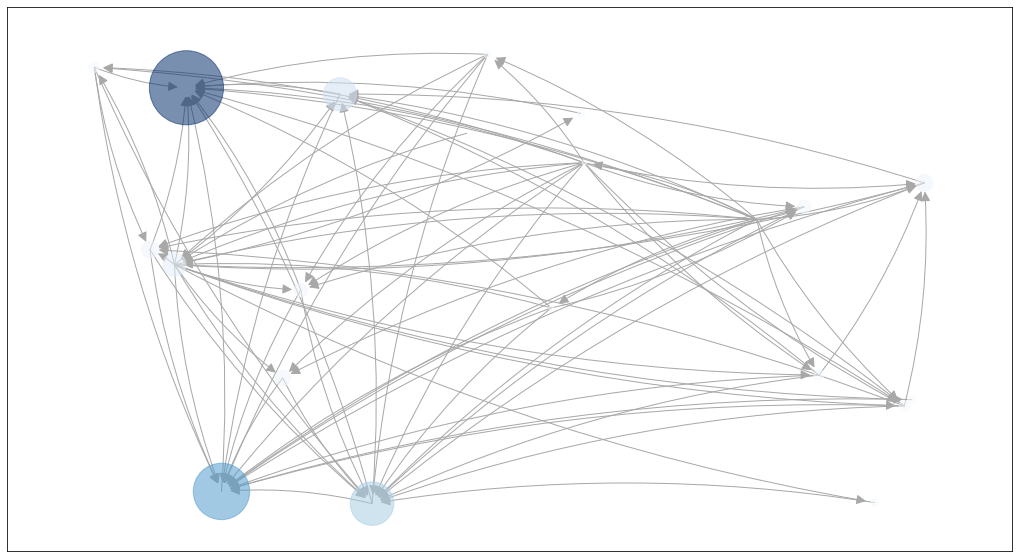

In [19]:
# Structurize rules using graph structure (HC 중요도: PageRank)
association_rules_pd = pd.DataFrame(association_rules)
association_rules_pd['length'] = association_rules_pd['items'].apply(lambda x: len(x))
association_rules_pd = association_rules_pd[association_rules_pd['length']==2]
# PageRank
G = nx.DiGraph()
G.add_edges_from(association_rules_pd['items'])
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize = 5500*(nsize-min(nsize))/(max(nsize)-min(nsize))
# Layout
pos = nx.random_layout(G)
# Visualize
plt.figure(figsize=(18, 10))
# nx.draw_networkx(G, font_family='Times New Roman', font_size=20, pos=pos, node_color=list(pr.values()), node_size=nsize, alpha=1.0, edge_color='0.75')
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), node_size=nsize, alpha=0.54, font_family='Times New Roman', font_size=20, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3, rad=0.08', arroswtyle='fancy', arrowsize=20, edge_color='0.66')
# nx.draw_networkx_labels(G, pos, font_size=24, font_family='Times New Roman')
plt.show()

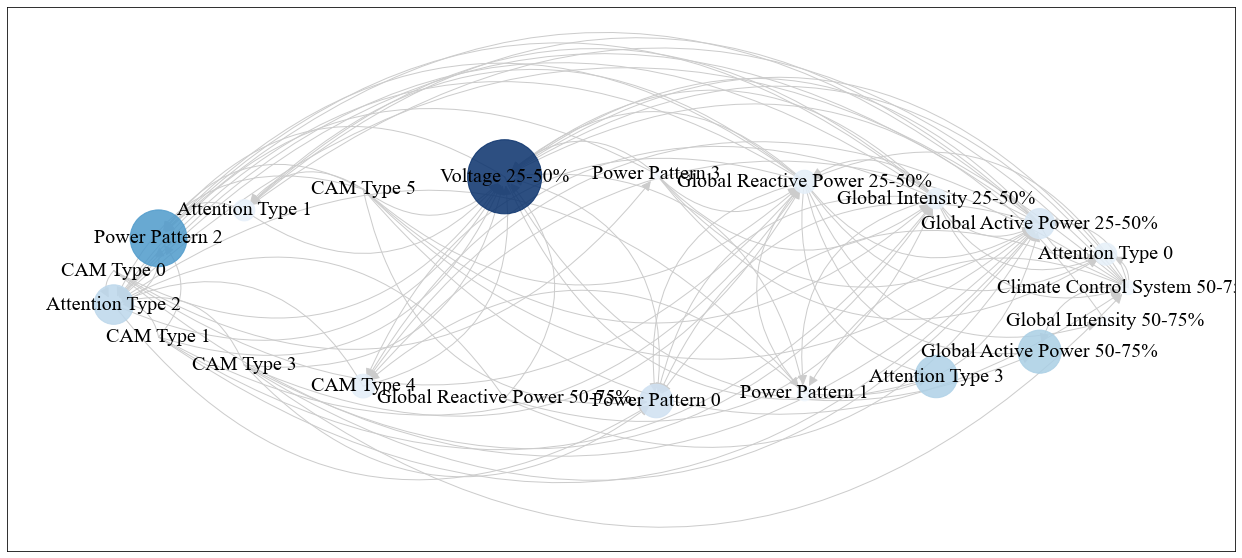

In [678]:
# Structurize rules using graph structure (HC 중요도: PageRank)
association_rules_pd = pd.DataFrame(association_rules)
association_rules_pd['length'] = association_rules_pd['items'].apply(lambda x: len(x))
association_rules_pd = association_rules_pd[association_rules_pd['length']==2]
# PageRank
G = nx.DiGraph()
G.add_edges_from(association_rules_pd['items'])
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize = 5500*(nsize-min(nsize))/(max(nsize)-min(nsize))
# Layout
pos = nx.shell_layout(G)
# Visualize
plt.figure(figsize=(22, 10))
# nx.draw_networkx(G, font_family='Times New Roman', font_size=20, pos=pos, node_color=list(pr.values()), node_size=nsize, alpha=1.0, edge_color='0.75')
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), node_size=nsize, alpha=0.85, font_family='Times New Roman', font_size=20, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3, rad=0.45', arroswtyle='fancy', arrowsize=20, edge_color='0.8')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Times New Roman')
plt.show()

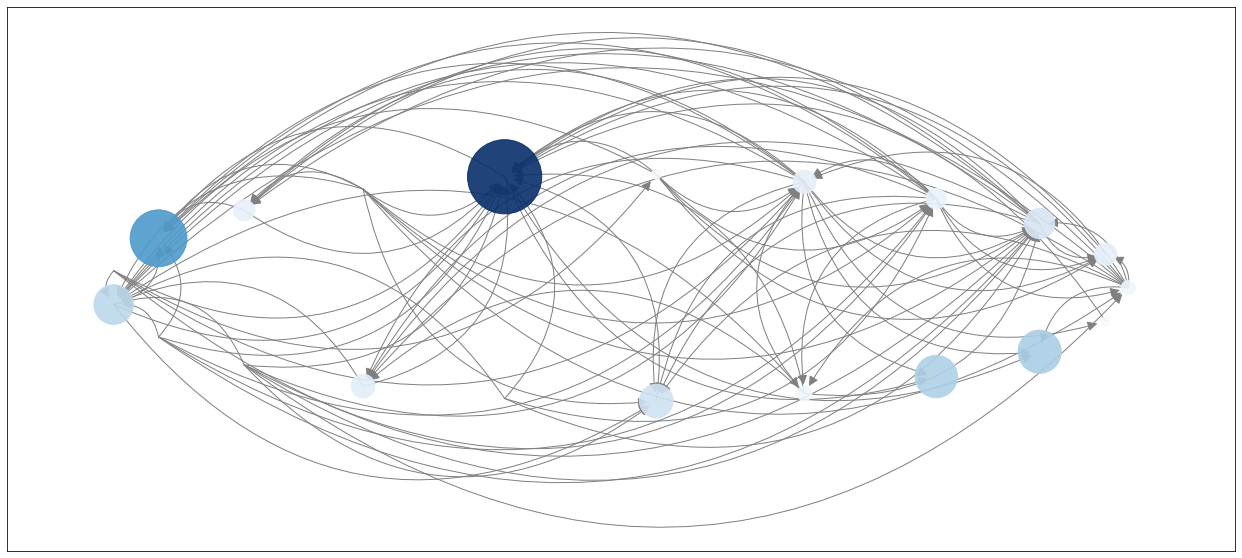

In [681]:
# Structurize rules using graph structure (HC 중요도: PageRank)
association_rules_pd = pd.DataFrame(association_rules)
association_rules_pd['length'] = association_rules_pd['items'].apply(lambda x: len(x))
association_rules_pd = association_rules_pd[association_rules_pd['length']==2]
# PageRank
G = nx.DiGraph()
G.add_edges_from(association_rules_pd['items'])
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize = 5500*(nsize-min(nsize))/(max(nsize)-min(nsize))
# Layout
pos = nx.shell_layout(G)
# Visualize
plt.figure(figsize=(22, 10))
# nx.draw_networkx(G, font_family='Times New Roman', font_size=20, pos=pos, node_color=list(pr.values()), node_size=nsize, alpha=1.0, edge_color='0.75')
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), node_size=nsize, alpha=0.9, font_family='Times New Roman', font_size=20, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3, rad=0.45', arroswtyle='fancy', arrowsize=20, edge_color='0.5')
# nx.draw_networkx_labels(G, pos, font_size=20, font_family='Times New Roman')
plt.show()